Author: Kamila Kussainova

In [75]:
#import the libraries
import pandas as pd
import numpy as np

#import the dataset
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
from sklearn.model_selection import train_test_split

#split off the target variable
#drop the target column from X, specify axis=1 to signify column instead of default axis=0 (row)

df = df.drop(['Id'], axis = 1)
X = df.drop(['Species'], axis = 1)
y = df['Species']

#random_state is used to make sure taht the results are reproducible, 42 is from The Hitchhikers' guide to the Galaxy, test size is 0.2 by convention
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
      

(120, 4) (30, 4) (120,) (30,)


In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Unique labels in the target variable: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


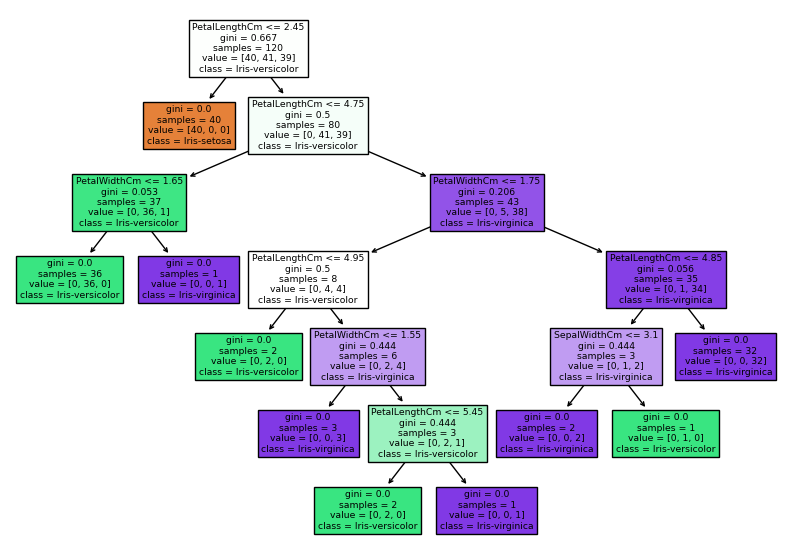

In [91]:
import numpy as np

# find target labels
unique_labels = np.unique(y)
print("Unique labels in the target variable:", unique_labels)

#plot the decision tree
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model, feature_names = X_train.columns, class_names= unique_labels, filled = True)
plt.show()
